In [2]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torch import autograd
from torch.autograd import Variable
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from skimage import io, transform, color
import os
import json
from PIL import Image

In [134]:
#def image_to_vector(image: numpy.ndarray) -> numpy.ndarray:

#    length, height, depth = image.shape
#    return image.reshape((length * height * depth, 1))
class browndataset(Dataset):
    def __init__(self, root_dir, img_transform=None,label_transform = None):

        
        #label_transform = transforms.Compose([transforms.ToTensor()])
        json_path = './label_images_of_brown.json'
        img_transform = transforms.Compose([
            transforms.ToTensor(),
    transforms.Resize((128,128)),
    transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
            ])     
        
        
        
        self.data = json.load(open(json_path))
        self.root_dir = root_dir
        self.label_transform = label_transform
        self.img_transform = img_transform
        
        
    def __len__(self):
        return len((self.data)["id"])

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.data["id"][idx])
        immm =io.imread(img_name)
        t_image = Image.fromarray(immm)
        t_image = self.img_transform(t_image)
        
        cl = self.data['classes'][idx]
        classes = np.array(cl)
        #classes = self.img_transform(cl)
        
        return t_image, classes
#img_size = 224


In [135]:
dbrown = browndataset( root_dir='./datasets/brown/test')

In [136]:
dbrown[0][0]

tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]])

In [115]:
dbrown[1][1]

array([0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
from io import BytesIO

import lmdb
from PIL import Image
from torch.utils.data import Dataset


class MultiResolutionDataset(Dataset):
    def __init__(self, path, transform, resolution=256):
        self.env = lmdb.open(
            path,
            max_readers=32,
            readonly=True,
            lock=False,
            readahead=False,
            meminit=False,
        )

        if not self.env:
            raise IOError('Cannot open lmdb dataset', path)

        with self.env.begin(write=False) as txn:
            self.length = int(txn.get('length'.encode('utf-8')).decode('utf-8'))

        self.resolution = resolution
        self.transform = transform

    def __len__(self):
        return self.length

    def __getitem__(self, index):
        with self.env.begin(write=False) as txn:
            key = f'{self.resolution}-{str(index).zfill(5)}'.encode('utf-8')
            img_bytes = txn.get(key)

        buffer = BytesIO(img_bytes)
        img = Image.open(buffer)
        img = self.transform(img)

        return img

In [24]:
chanels = {4: 512,
            8: 512,
            16: 512,
            32: 512}
chanels

{4: 512, 8: 512, 16: 512, 32: 512}

In [26]:
type(chanels)

dict

In [45]:
mean=(0.5,)

In [27]:
data_loader = DataLoader(dbrown, batch_size=5, shuffle=True, num_workers=4)

In [46]:
mean

(0.5,)

In [84]:
pip install lmdb

     |████████████████████████████████| 876 kB 1.8 MB/s eta 0:00:01
  Created wheel for lmdb: filename=lmdb-1.0.0-cp36-cp36m-linux_x86_64.whl size=220787 sha256=2c14e172ab60bcf856df6ac1ba2a17d3cf86de57c37d0c4b6f54d2ba827e1b56
  Stored in directory: /root/.cache/pip/wheels/f7/c0/90/349862eab66c0e0fc1644577c75af1d7c46465e571c437bb89
Successfully built lmdb
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [116]:
from io import BytesIO
import lmdb
from PIL import Image
#f = open("./datasets/brown/train/10.png", "rb")
#buffer = BytesIO(f)
with open("./datasets/brown/train/10.png", "rb") as image:
    f = image.read()
    b = bytearray(f)
    buffer1 = BytesIO(f)
    img = Image.open(buffer1)
    print(b[0])
buffer2 = BytesIO(b)
buffer1


137


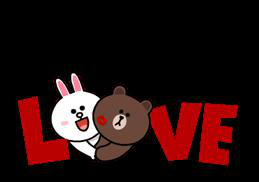

In [117]:
img

In [108]:
buffer2

In [93]:
from os import listdir
listdir('./datasets/brown/train/')

['88.png',
 '56.png',
 '68.png',
 '82.png',
 '33.png',
 '53.png',
 '71.png',
 '61.png',
 '27.png',
 '86.png',
 '18.png',
 '41.png',
 '74.png',
 '15.png',
 '2.png',
 '8.png',
 '49.png',
 '58.png',
 '0.png',
 '51.png',
 '75.png',
 '36.png',
 '70.png',
 '60.png',
 '25.png',
 '19.png',
 '30.png',
 '62.png',
 '64.png',
 '92.png',
 '29.png',
 '13.png',
 '85.png',
 '3.png',
 '17.png',
 '5.png',
 '84.png',
 '67.png',
 '45.png',
 '1.png',
 '87.png',
 '69.png',
 '89.png',
 '57.png',
 '42.png',
 '78.png',
 '59.png',
 '54.png',
 '52.png',
 '23.png',
 '47.png',
 '66.png',
 '4.png',
 '80.png',
 '77.png',
 '39.png',
 '10.png',
 '24.png',
 '32.png',
 '6.png',
 '43.png',
 '22.png',
 '63.png',
 '31.png',
 '14.png',
 '48.png',
 '26.png',
 '55.png',
 '11.png',
 '35.png',
 '34.png',
 '37.png',
 '65.png',
 '20.png',
 '12.png',
 '81.png',
 '83.png',
 '9.png',
 '44.png',
 '91.png',
 '90.png',
 '16.png',
 '40.png',
 '21.png',
 '38.png',
 '.ipynb_checkpoints',
 '94.png',
 '7.png',
 '73.png',
 '93.png',
 '50.png

In [94]:
sss = lmdb.open(
            "./datasets/brown/train/",
            max_readers=32,
            readonly=True,
            lock=False,
            readahead=False,
            meminit=False
        )

Error: ./datasets/brown/train/: No such file or directory

In [127]:
type(labels)

numpy.ndarray

In [164]:
label_emb = nn.Embedding(10, 9)

In [167]:
labels = dbrown[1][1]
labels = torch.from_numpy(labels)
c = label_emb(labels)

In [168]:
c.size()

torch.Size([9, 9])